In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.graph_objs import *

% matplotlib inline

In [4]:
occurred_data = pd.read_csv('data/occured-rate-per-1000.csv')

In [5]:
occurred_data.head()

,Geography,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,St. John's,7840.62,6596.12,7294.28,7030,7428.25,6903.21,7163.52,6955.84,7131.69,...,7597.73,8084.74,8479.56,7867.74,7611.67,7307.64,6451.93,6525.37,6333.97,5751.42
1,Prince Edward Island,7110.2,7933.47,7657.2,7866.06,8655.28,9523.32,8974.1,8312.63,7513.15,...,6934.08,7132.49,7140.84,7289.74,7360.08,6541.41,5303.77,4677.40,4928.68,4620.41
2,Halifax,10328.9,10370.94,9051.1,9611.07,9395.51,9754.53,10371.9,9566.1,9229.97,...,7941.02,7884.31,8142.62,7299.21,6596.21,5910.15,5912.72,5385.35,5205.48,5557.99
3,Moncton,..,..,..,..,..,..,..,..,8646.60,...,6866.40,6593.89,6609.92,6767.04,7740.44,6659.25,6265.06,7366.87,6788.20,7786.08
4,Saint John,8689.34,7972.84,7335.47,7185.43,8149.06,8221.61,7657.26,6975.85,7170.61,...,7521.62,7244.58,7014.68,6250.72,6214.52,5620.77,5215.10,5132.38,4812.21,4954.71


In [30]:
data = occurred_data.melt(id_vars=['Geography'])
data = data.replace('..', np.nan)
data.columns = ['City', 'Year', 'Rate']
data['Rate'] = data['Rate'].apply(pd.to_numeric)
data['Year'] = data['Year'].apply(pd.to_numeric)
data.tail()

,City,Year,Rate
715,Vancouver,2017,7651.14
716,Victoria,2017,6105.14
717,Yukon,2017,22865.91
718,Northwest Territories,2017,44523.81
719,Nunavut,2017,36485.42


# Visualize Data

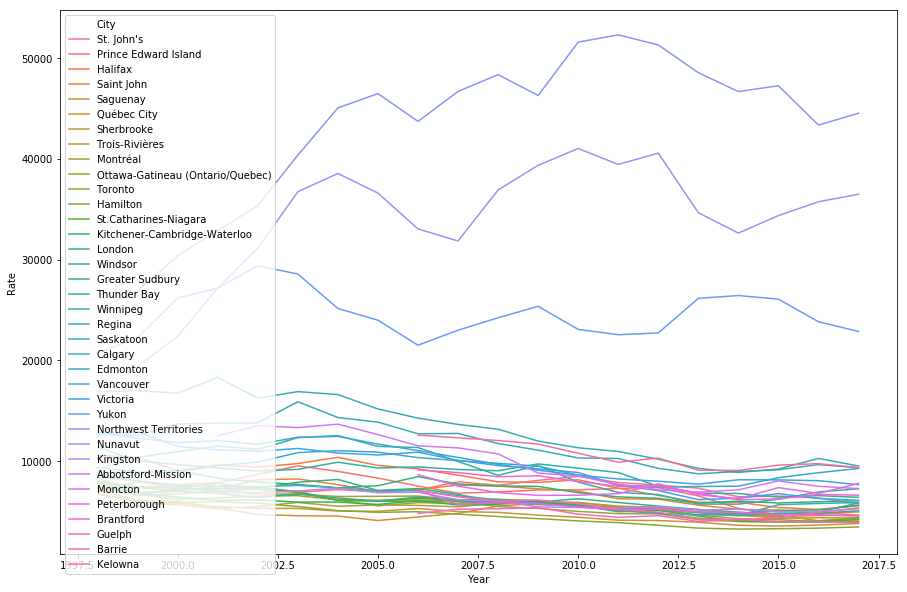

In [32]:
plt.figure(figsize=(15,10))
plt.legend()
sns.lineplot(x='Year', y='Rate', hue='City', data=data.dropna())

In [38]:
traces = []
for city in set(data['City']):
    traces.append(Scatter(
        name = city,
        y = data[data['City'] == city]['Rate'],
        x = data[data['City'] == city]['Year']
    ))

In [42]:
data = Data(traces)

layout = Layout(
    title='Crime Rates',
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title='All Crimes per 100,000 People'
    ),
    autosize=False,
    paper_bgcolor='rgb(226, 224, 222)',
    plot_bgcolor='rgb(226, 224, 222)'
)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename = 'Crime-Rates')